# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [2]:
import numpy as np

In [3]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()

In [4]:
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period


In [4]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [5]:
from src.utils import get_a_random_chunk_property

In [6]:
get_a_random_chunk_property(data)

date: 2022-04-02
NEO name: (2022 FK4)
name: (2022 FK4)


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [5]:
# Write your code
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass
from scipy import stats
import numpy as np

# Set your NASA API KEY
api_key = getpass()

# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a dictionary to store the average size for each day
average_sizes = {}

# Initialize a dictionary to store the proportion of potentially hazardous NEOs for each day
proportions_hazardous = {}

# Initialize a dictionary to store the NEO with closest approach for each day
closest_neos = {}

# Initialize a list to store the NEO sizes
neo_sizes = []

# Initialize a list to store whether a NEO is potentially hazardous
is_hazardous = []

# Fetch data from the NASA API 7 days at a time
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data = response.json()
    
    # Iterate over the NEOs in the fetched data
    for date_str, neo_data in data['near_earth_objects'].items():
        date = datetime.strptime(date_str, '%Y-%m-%d')
        
        # Calculate the average size for the NEOs on the current day
        sizes = [neo['estimated_diameter']['kilometers']['estimated_diameter_max'] for neo in neo_data]
        average_size = sum(sizes) / len(sizes)
        
        # Store the average size in the dictionary
        average_sizes[date] = average_size
        
        # Calculate the proportion of potentially hazardous NEOs on the current day
        hazardous_neos = [neo for neo in neo_data if neo['is_potentially_hazardous_asteroid']]
        proportion_hazardous = len(hazardous_neos) / len(neo_data)
        
        # Store the proportion in the dictionary
        proportions_hazardous[date] = proportion_hazardous
        
        # Find the NEO with closest approach for the current day
        closest_neo = min(neo_data, key=lambda neo: neo['close_approach_data'][0]['miss_distance']['astronomical'])
        
        # Store the closest NEO in the dictionary
        closest_neos[date] = closest_neo
        
        # Append the size of each NEO to the list
        neo_sizes.extend([neo['estimated_diameter']['kilometers']['estimated_diameter_max'] for neo in neo_data])
        
        # Append whether each NEO is potentially hazardous to the list
        is_hazardous.extend([neo['is_potentially_hazardous_asteroid'] for neo in neo_data])
    
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Calculate the mean, median, mode, and standard deviation of the NEO sizes
mean_size = np.mean(neo_sizes)
median_size = np.median(neo_sizes)
mode_size = stats.mode(neo_sizes, axis = None, keepdims=True).mode[0]
std_dev_size = np.std(neo_sizes)

# Determine if the size of a NEO is correlated with whether it is potentially hazardous
correlation = np.correlate(neo_sizes, is_hazardous)


# Display the calculated statistics
print(f"Mean Size: {mean_size}")
print(f"Median Size: {median_size}")
print(f"Mode Size: {mode_size}")
print(f"Standard Deviation: {std_dev_size}")

Mean Size: 0.20791612723515276
Median Size: 0.0765667087
Mode Size: 0.0472106499
Standard Deviation: 0.4082359852108826


### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

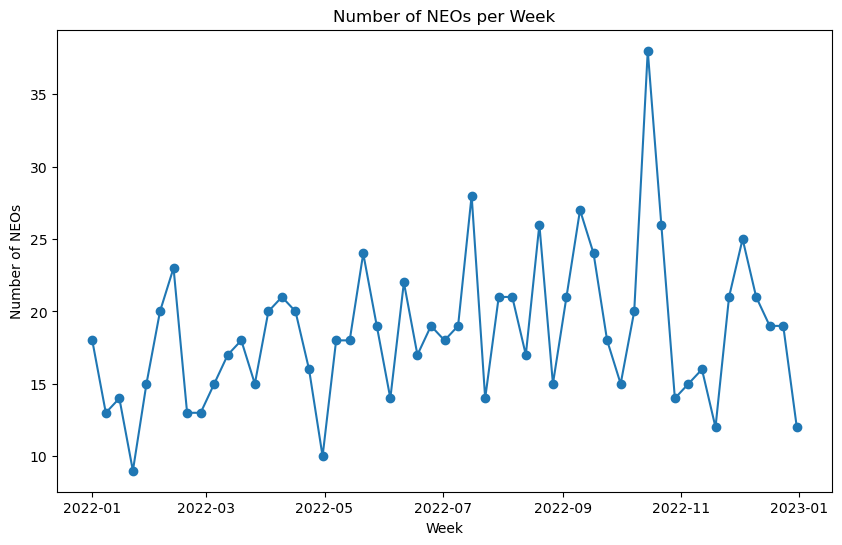

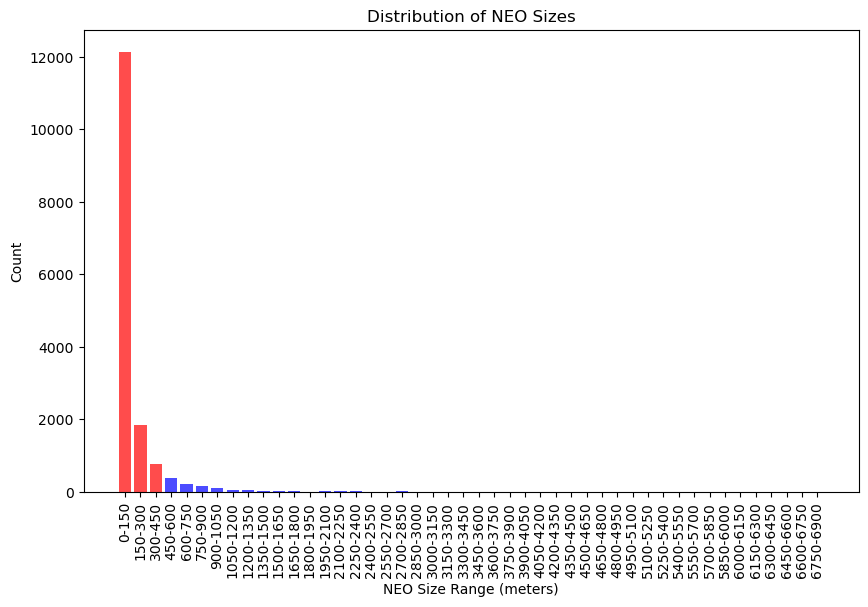

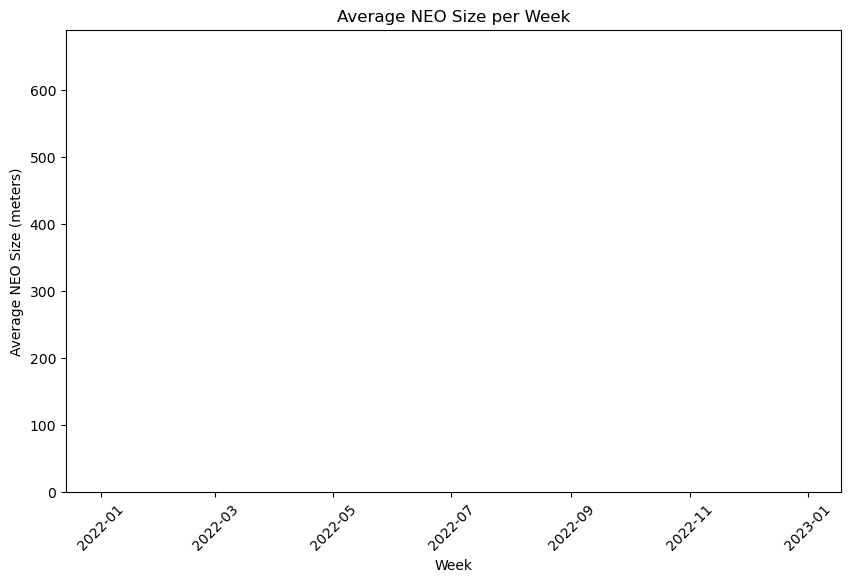

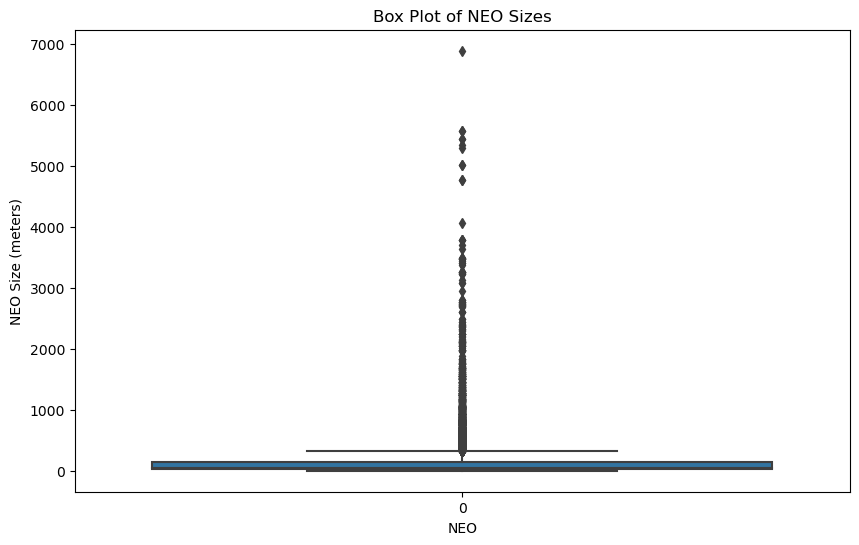

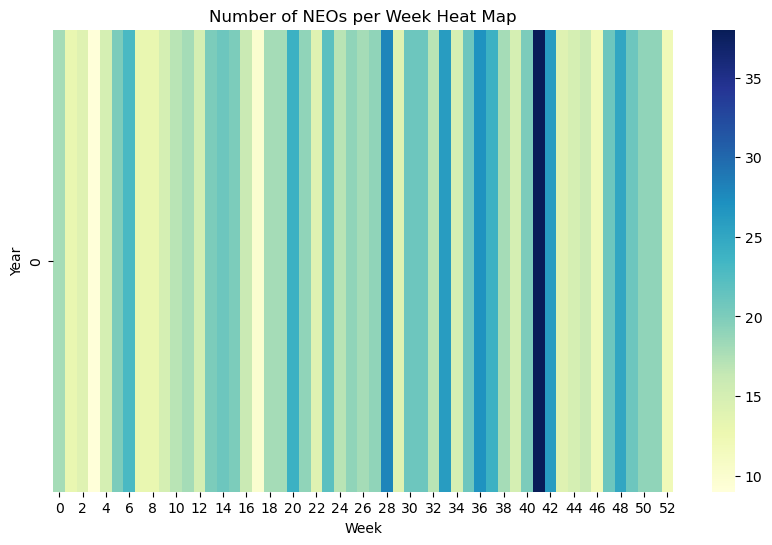

In [18]:
import requests
import time
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass

# Set your NASA API KEY
api_key = getpass()

# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize lists and dictionaries
neos_per_week = []
neo_sizes_list = []
average_sizes = {}
proportions_hazardous = {}
closest_neos = {}

# Fetch data from the NASA API 7 days at a time
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data = response.json()

    # Iterate over the NEOs in the fetched data
    for _, neo_data in data['near_earth_objects'].items():
        # Store the number of NEOs per week
        neos_per_week.append(len(neo_data))

        # Extract NEO sizes in meters
        for neo in neo_data:
            size_info = neo['estimated_diameter']['meters']
            neo_sizes_list.append(size_info['estimated_diameter_min'])
            neo_sizes_list.append(size_info['estimated_diameter_max'])

    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Line plot of the number of NEOs per week
dates = np.arange(start_date, end_date, timedelta(weeks=1))[:len(neos_per_week)]
neos_per_week = neos_per_week[:len(dates)]

plt.figure(figsize=(10, 6))
plt.plot(dates, neos_per_week, marker='o')
plt.xlabel('Week')
plt.ylabel('Number of NEOs')
plt.title('Number of NEOs per Week')
plt.show()

# Group NEO sizes by size differences
bin_size = 150
bins = np.arange(min(neo_sizes_list), max(neo_sizes_list) + bin_size, bin_size)

# Calculate the histogram of NEO sizes
hist, _ = np.histogram(neo_sizes_list, bins=bins)

# Get the indices of outliers
outlier_indices = np.where(hist > np.percentile(hist, 95))[0]

# Bar Plot of NEO Sizes with outliers highlighted
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
colors = ['b' if i not in outlier_indices else 'r' for i in range(len(hist))]

plt.figure(figsize=(10, 6))
plt.bar(labels, hist, alpha=0.7, color=colors)
plt.xlabel('NEO Size Range (meters)')
plt.ylabel('Count')
plt.title('Distribution of NEO Sizes')
plt.xticks(rotation=90)
plt.show()

# Convert NEO sizes list to numpy array
neo_sizes_array = np.array(neo_sizes_list)

# Calculate average NEO size per week
average_sizes = []
index = 0
for count in neos_per_week:
    total_size = np.sum(neo_sizes_array[index:index+count])
    weekly_average = total_size / count
    average_sizes.append(weekly_average)
    index += count


# Bar plot of the average NEO size per week
plt.figure(figsize=(10, 6))
plt.bar(dates, average_sizes, alpha=0.7, width=7)
plt.xlabel('Week')
plt.ylabel('Average NEO Size (meters)')
plt.title('Average NEO Size per Week')
plt.xticks(rotation=45)
plt.show()

# Create a box plot of the NEO sizes
plt.figure(figsize=(10, 6))
sns.boxplot(data=neo_sizes_array)
plt.xlabel('NEO')
plt.ylabel('NEO Size (meters)')
plt.title('Box Plot of NEO Sizes')
plt.show()

# Create a heat map of the number of NEOs per week
neos_per_week_array = np.array(neos_per_week).reshape(-1, 53)
plt.figure(figsize=(10, 6))
sns.heatmap(neos_per_week_array, cmap='YlGnBu')
plt.xlabel('Week')
plt.ylabel('Year')
plt.title('Number of NEOs per Week Heat Map')
plt.show()
#This plot isn't that usefull as we are only loooking at data for one year, currently.

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

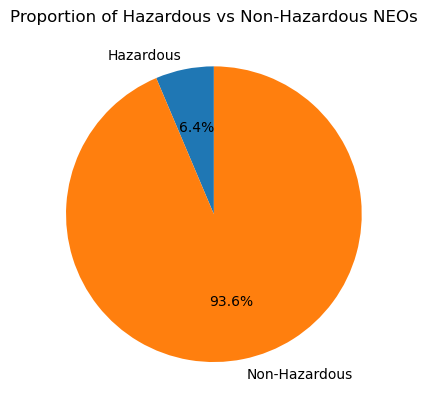

In [8]:
import requests
import time
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
import plotly.express as px

# Set your NASA API KEY
api_key = getpass()

# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize lists and dictionaries
neos_per_week = []
neo_sizes_list = []
hazardous_count = 0
total_neos = 0

# Fetch data from the NASA API 7 days at a time
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data = response.json()

    for _, neo_data in data['near_earth_objects'].items():
        for neo in neo_data:
            # Store the number of NEOs per week
            neos_per_week.append(len(neo_data))

            # Extract NEO sizes in meters
            size_info = neo['estimated_diameter']['meters']
            neo_sizes_list.append(size_info['estimated_diameter_min'])
            neo_sizes_list.append(size_info['estimated_diameter_max'])

            # Check if the NEO is potentially hazardous
            is_hazardous = neo['is_potentially_hazardous_asteroid']
            if is_hazardous:
                hazardous_count += 1

            total_neos += 1

    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Calculate non-hazardous count
non_hazardous_count = total_neos - hazardous_count

# Pie chart: Proportion of hazardous VS non-hazardous NEOs
labels = ['Hazardous', 'Non-Hazardous']
values = [hazardous_count, non_hazardous_count]

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the plot title
plt.title('Proportion of Hazardous vs Non-Hazardous NEOs')

# Show the plot
plt.show()

# Extract close approach distances
close_approach_distances = []
for _, neo_data in data['near_earth_objects'].items():
    for neo in neo_data:
        close_approach = neo['close_approach_data']
        if close_approach:
            miss_distance = close_approach[0]['miss_distance']
            close_approach_distances.append(miss_distance['astronomical'])

# Create a scatter plot
fig = px.scatter(x=neo_sizes_list[:len(close_approach_distances)], y=close_approach_distances, labels={'x': 'NEO Size (meters)', 'y': 'Close Approach Distance (astronomical units)'}, title='Correlation between NEO Size and Close Approach Distance')
fig.show()


### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

When we look at the graphs from task 3, we can see that there is a fairly even spread of NEOs over the weeks - expet for week 41 where there is a big jump in sightings. We can also see most of these NEOs are around or smaller than 150 meters, by a huge metric. From the Data collected by NASA there is nearly 13000 NEOs with a size of 150 meters or less. whereas there is at most 5000 with sizes bigger than 150 meters, all this is to say that nearly two thirds of the NEOs and while the 5000 NEOs bigger than 150 meters sound like a lot most of them are in the range of 150--1000 meters and still they are predominantly in the 150-450 meter range. 

To get a better understanding of the potential dangers of the NEOs, it would be a good idea to look at a larger data set to get a better picture if the swings in amount and size of NEOs are more or less random. Or if there is a patern to the amount and size of NEOs that comes into contact with earth. But as all of this happens in space, the time scale of things often happens in the 10s or 100s of years, so that is out of the scope of this code. But by looking at maybe 5-10 years i would be possible to get a clearer picture of the NEOs and how "close" earth is to have hazardous NEOs. By focusing on this it might be possible to predict when and where these NEOs are and if they might be hazardous to earth.

We could use the method from the scientific papar: "Size and Shape of Asteroids from Inversion of Gaia Astrometry" by Carry et al. (2020). This paper focuses on estimating the size and shape of asteroids, and if it is possible to know how big these astroids are it is then possible to figure out if these astroids would be hazardous to earth and thereby maybe doing something about them before they become a threath to earth. This paper focuses on these four points: Size estimation, shape modeling, Statistical analysis and Gaia mission data. By consindering this paper's methods of estimating the size and shape of the NEOs by using the data collected by the Gaia mission, it would be possible to get a better understanding of the NEO population's characteristics, impact risks, and internal structures. 

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.

See the Beamer